In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-crime/london_crime_by_lsoa.csv


In [81]:
import numpy as np
import pandas as pd

In [82]:
df_crime = pd.read_csv("../input/london-crime/london_crime_by_lsoa.csv")
df_crime

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [83]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [84]:
df_crime.shape

(13490604, 7)

In [85]:
df_crime.borough.nunique()

33

In [86]:
df_crime.set_index("borough", inplace=True)
df_crime

,lsoa_code,major_category,minor_category,value,year,month
borough,,,,,,
Croydon,E01001116,Burglary,Burglary in Other Buildings,0,2016,11
Greenwich,E01001646,Violence Against the Person,Other violence,0,2016,11
Bromley,E01000677,Violence Against the Person,Other violence,0,2015,5
Redbridge,E01003774,Burglary,Burglary in Other Buildings,0,2016,3
Wandsworth,E01004563,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
Brent,E01000504,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
Hillingdon,E01002504,Robbery,Personal Property,1,2015,6
Sutton,E01004165,Burglary,Burglary in a Dwelling,0,2011,2


In [87]:
croydon = df_crime.loc["Croydon"]
croydon

,lsoa_code,major_category,minor_category,value,year,month
borough,,,,,,
Croydon,E01001116,Burglary,Burglary in Other Buildings,0,2016,11
Croydon,E01001029,Drugs,Possession Of Drugs,0,2010,12
Croydon,E01001193,Theft and Handling,Other Theft,1,2014,5
Croydon,E01001171,Violence Against the Person,Offensive Weapon,0,2012,12
Croydon,E01000996,Drugs,Drug Trafficking,0,2008,2
...,...,...,...,...,...,...
Croydon,E01001146,Sexual Offences,Other Sexual,0,2008,4
Croydon,E01001111,Criminal Damage,Criminal Damage To Dwelling,0,2016,2
Croydon,E01001135,Criminal Damage,Other Criminal Damage,0,2015,4


**Area Plot**

Q1. What is the major crime in the London?

In [88]:
df_most = df_crime["major_category"].value_counts()
df_most

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

In [89]:
import matplotlib as mpl
import matplotlib.pyplot as plt

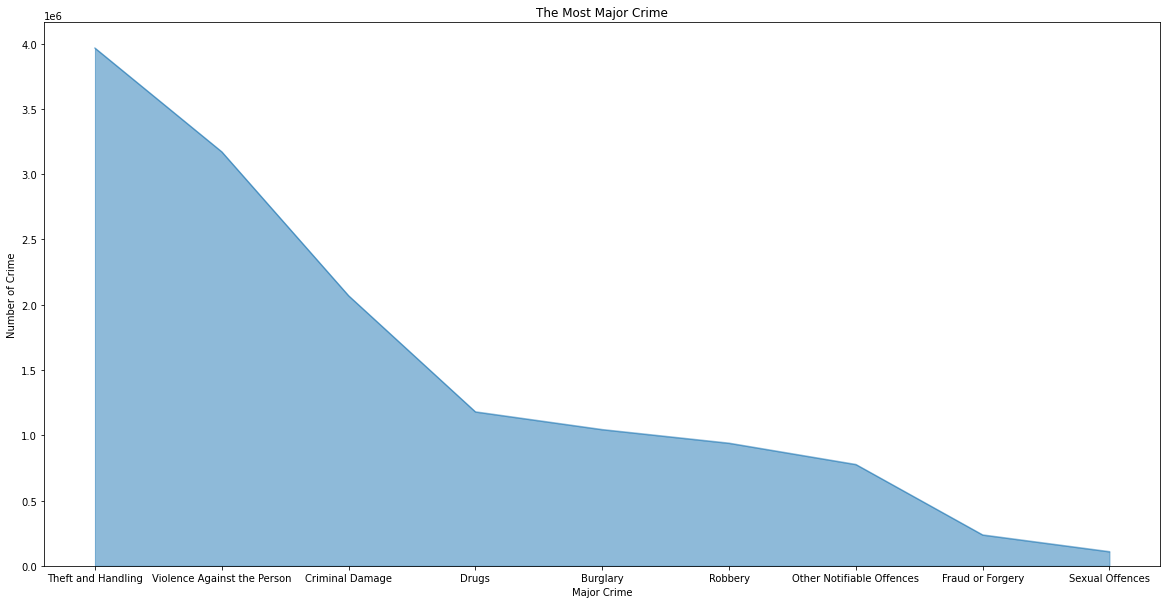

In [90]:
df_most.plot(kind ="area",
            stacked = False,
            figsize = (20,10),
            )

plt.title("The Most Major Crime")
plt.ylabel("Number of Crime")
plt.xlabel("Major Crime")

plt.show()

Based on the data and like shown in the Areaplot, the most major crime in the London is **theft and handling**

**Bar Chart**

Q2. What is the most minor crime in the London?

In [91]:
df_minor = df_crime["minor_category"].value_counts()
df_minor

Theft From Motor Vehicle                  522180
Common Assault                            522180
Other Theft                               522180
Harassment                                522072
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

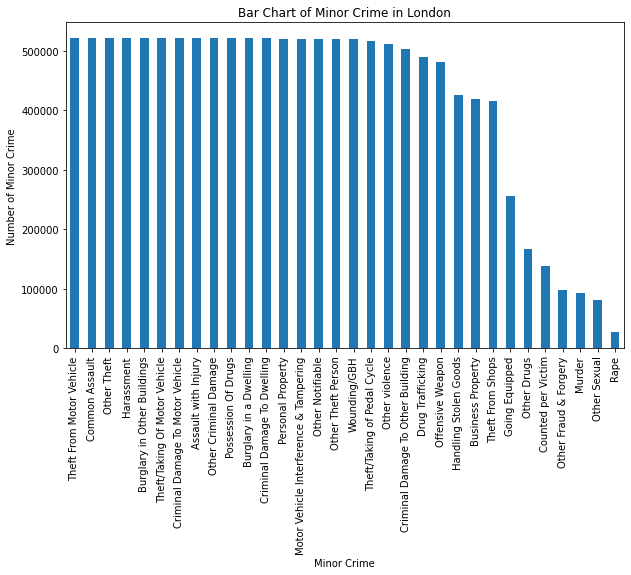

In [92]:
df_minor.plot(kind = "bar", figsize=(10,6))

plt.title("Bar Chart of Minor Crime in London")
plt.ylabel("Number of Minor Crime")
plt.xlabel("Minor Crime")

plt.show()

Based on data and the bar chart, the most minor crime in the London are **other theft, common assault, and  theft from  motor vehicle**

In [93]:
df_crime.groupby("borough", sort=False)["major_category"].value_counts()

borough         major_category             
Croydon         Theft and Handling             176256
                Violence Against the Person    143424
                Criminal Damage                 94176
                Drugs                           51948
                Burglary                        47520
                                                ...  
City of London  Criminal Damage                  1188
                Drugs                             756
                Burglary                          540
                Robbery                           540
                Other Notifiable Offences         432
Name: major_category, Length: 295, dtype: int64

**Pie Chart**

Q3. Which Borough often have major crime  cases?

In [94]:
borough = df_crime.groupby("borough", sort=False)["major_category"].count().head()
borough

borough
Croydon       602100
Greenwich     421200
Bromley       523908
Redbridge     445716
Wandsworth    498636
Name: major_category, dtype: int64

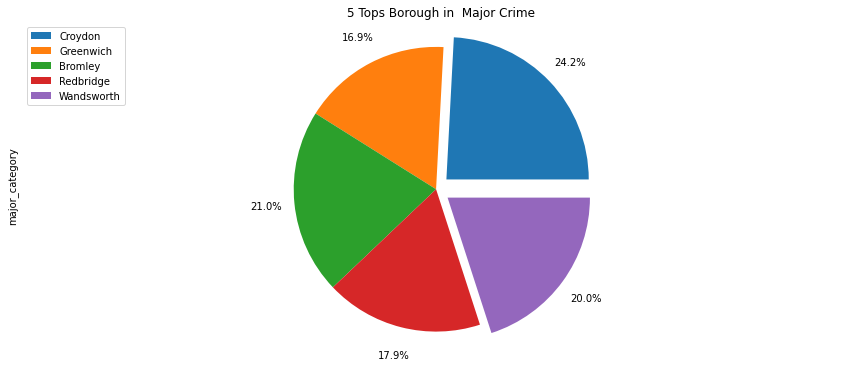

In [95]:
borough.plot(
    kind="pie",
    figsize=(15, 6),
    autopct="%1.1f%%",
    labels=None,
    pctdistance=1.2,
    explode=[0.1,0, 0, 0, 0.1]
)
plt.axis("equal")
plt.title("5 Tops Borough in  Major Crime")
plt.legend(labels=borough.index, loc="upper left")
plt.show()

**Croydon** is borough with the most major crime cases (24.2%)

**Box Plot**

Q4. Whats the median value of major crime case in Croydon?

In [96]:
croydon = df_crime.groupby("borough", sort=False)["major_category"].value_counts().head(9)
croydon

borough  major_category             
Croydon  Theft and Handling             176256
         Violence Against the Person    143424
         Criminal Damage                 94176
         Drugs                           51948
         Burglary                        47520
         Robbery                         43740
         Other Notifiable Offences       30564
         Fraud or Forgery                 9396
         Sexual Offences                  5076
Name: major_category, dtype: int64

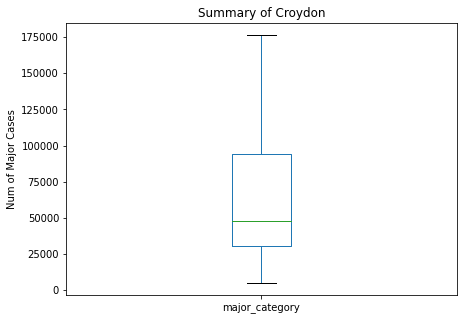

In [97]:
croydon.plot(kind="box", figsize=(7, 5))
plt.title("Summary of Croydon")
plt.ylabel("Num of Major Cases")
plt.show()

In [98]:
croydon.describe()

count         9.000000
mean      66900.000000
std       59312.089493
min        5076.000000
25%       30564.000000
50%       47520.000000
75%       94176.000000
max      176256.000000
Name: major_category, dtype: float64

**Median value** of major crime cases in London is 47520

**Scatter Plot**

Q5. How is the distribution of data from minor crime cases in Croydon?

In [99]:
croydon = df_crime.groupby("borough", sort=False)["minor_category"].value_counts().head(9)
croy = pd.Series(croydon)
croy

borough  minor_category                        
Croydon  Assault with Injury                       23760
         Burglary in Other Buildings               23760
         Burglary in a Dwelling                    23760
         Common Assault                            23760
         Criminal Damage To Dwelling               23760
         Criminal Damage To Motor Vehicle          23760
         Harassment                                23760
         Motor Vehicle Interference & Tampering    23760
         Other Criminal Damage                     23760
Name: minor_category, dtype: int64

In [100]:
croy_frame  = pd.DataFrame(croy)
croy_frame

minor_category
borough minor_category                                        
Croydon Assault with Injury                              23760
        Burglary in Other Buildings                      23760
        Burglary in a Dwelling                           23760
        Common Assault                                   23760
        Criminal Damage To Dwelling                      23760
        Criminal Damage To Motor Vehicle                 23760
        Harassment                                       23760
        Motor Vehicle Interference & Tampering           23760
        Other Criminal Damage                            23760

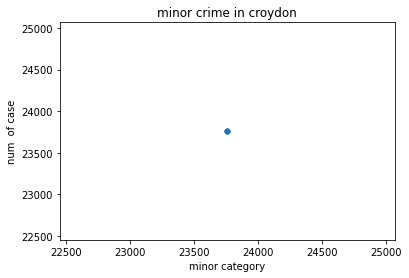

In [101]:
croy_frame.plot(kind="scatter", x="minor_category", y="minor_category")
plt.title("minor crime in croydon")
plt.xlabel("minor category")
plt.ylabel("num  of case")
plt.show()


The distribution of minor crime data in Croydon is centered in one point because the total cases each crime has same value,which is 23760.

In [102]:
df_crime.columns

Index(['lsoa_code', 'major_category', 'minor_category', 'value', 'year',
       'month'],
      dtype='object')

In [103]:
summary_cols = ["minor_category", "year", "month"]
df_summary = df_crime[summary_cols].copy()
df_summary

,minor_category,year,month
borough,,,
Croydon,Burglary in Other Buildings,2016,11
Greenwich,Other violence,2016,11
Bromley,Other violence,2015,5
Redbridge,Burglary in Other Buildings,2016,3
Wandsworth,Personal Property,2008,6
...,...,...,...
Brent,Criminal Damage To Dwelling,2015,2
Hillingdon,Personal Property,2015,6
Sutton,Burglary in a Dwelling,2011,2


Q6. How is the distribution of data from least minor crime cases in Bromley?

In [104]:
Bromley = df_summary.loc["Bromley",["minor_category"]].value_counts().tail(6)
Bromley

minor_category       
Counted per Victim       5724
Other Drugs              3672
Other Fraud & Forgery    2808
Other Sexual             2160
Murder                   1296
Rape                      432
dtype: int64

In [105]:
brom_frame  = pd.DataFrame(Bromley)
brom_frame

,0
minor_category,
Counted per Victim,5724
Other Drugs,3672
Other Fraud & Forgery,2808
Other Sexual,2160
Murder,1296
Rape,432


In [106]:
brom_frame.rename(columns={0: "total"}, inplace=True)
brom_frame

,total
minor_category,
Counted per Victim,5724
Other Drugs,3672
Other Fraud & Forgery,2808
Other Sexual,2160
Murder,1296
Rape,432


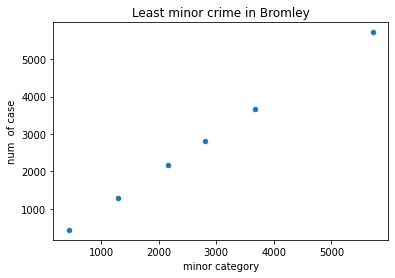

In [107]:
brom_frame.plot(kind="scatter", x="total", y="total")
plt.title("Least minor crime in Bromley")
plt.xlabel("minor category")
plt.ylabel("num  of case")
plt.show()

In [108]:
year = df_summary[df_summary["year"] == 2011].value_counts()
year

minor_category            year  month
Common Assault            2011  1        4835
Theft From Motor Vehicle  2011  3        4835
                                12       4835
                                11       4835
                                10       4835
                                         ... 
Rape                      2011  7         250
                                8         250
                                9         250
                                10        250
                                12        250
Length: 384, dtype: int64

In [109]:
year_frame  = pd.DataFrame(year)
year_frame

0
minor_category           year month      
Common Assault           2011 1      4835
Theft From Motor Vehicle 2011 3      4835
                              12     4835
                              11     4835
                              10     4835
...                                   ...
Rape                     2011 7       250
                              8       250
                              9       250
                              10      250
                              12      250

[384 rows x 1 columns]

In [110]:
year_frame.rename(columns={0: "total"}, inplace=True)
year_frame

total
minor_category           year month       
Common Assault           2011 1       4835
Theft From Motor Vehicle 2011 3       4835
                              12      4835
                              11      4835
                              10      4835
...                                    ...
Rape                     2011 7        250
                              8        250
                              9        250
                              10       250
                              12       250

[384 rows x 1 columns]

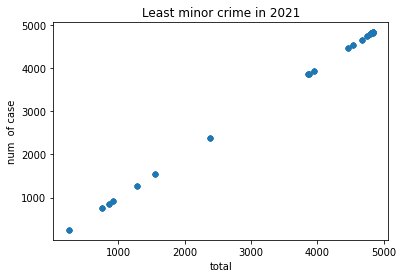

In [111]:
year_frame.plot(kind="scatter", x="total", y="total")
plt.title("Least minor crime in 2021")
plt.ylabel("num  of case")
plt.show()

**Histogram**

In [112]:
Bromley = df_summary.loc["Bromley",["minor_category"]].value_counts().tail(6)
count, bin_edges = np.histogram(Bromley)

print(count)
print(bin_edges)

[1 1 0 1 1 0 1 0 0 1]
[ 432.   961.2 1490.4 2019.6 2548.8 3078.  3607.2 4136.4 4665.6 5194.8
 5724. ]


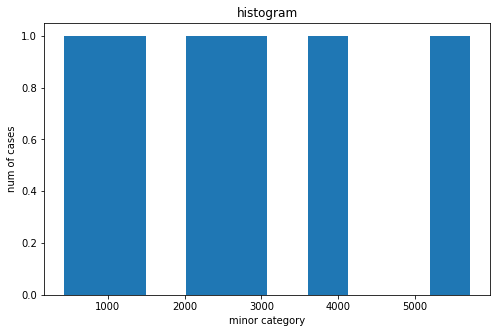

In [113]:
Bromley.plot(kind= "hist", figsize=(8, 5))
plt.title("histogram")
plt.ylabel("num of cases")
plt.xlabel("minor category")

plt.show()

In [114]:
df_crime = pd.read_csv("../input/london-crime/london_crime_by_lsoa.csv")
df_crime.columns = list(map(str, df_crime.columns))
df_crime

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [115]:
import folium

In [116]:
sample_crime = df_crime.sample(n=100, random_state = 11)
sample_crime

,lsoa_code,borough,major_category,minor_category,value,year,month
876336,E01000381,Bexley,Violence Against the Person,Other violence,0,2016,4
5194424,E01000313,Barnet,Violence Against the Person,Harassment,0,2014,1
4472248,E01001679,Greenwich,Criminal Damage,Criminal Damage To Other Building,0,2014,6
3349560,E01000992,Croydon,Theft and Handling,Other Theft,1,2016,6
1511157,E01004043,Southwark,Theft and Handling,Other Theft,3,2015,4
...,...,...,...,...,...,...,...
9152231,E01002803,Islington,Violence Against the Person,Common Assault,1,2009,7
9222672,E01000897,Camden,Violence Against the Person,Harassment,0,2013,12
4439287,E01000718,Bromley,Criminal Damage,Other Criminal Damage,1,2014,5
10393629,E01004296,Tower Hamlets,Theft and Handling,Theft From Shops,0,2015,2


**Folium Maps**

In [117]:
latitude = 51.5074
longitude = 0.1278

sf_map = folium.Map(location=(latitude, longitude), zoom_start=9)
sf_map